---
title: "Loss function"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-18"
categories: [python, datacamp, logistic regression, machine learning, SVM ]
image: "lossFunction.jpg"

---

# Loss function

We will discover the conceptual framework behind logistic regression and SVMs. This will let us delve deeper into the inner workings of these models.

This **Loss function** is part of [Datacamp course: Linear Classifiers in Python](https://app.datacamp.com/learn/courses/linear-classifiers-in-python)

This is my learning experience of data science through DataCamp

### Linear classifier prediction

* raw model output = coefficient * feature + intercept
* Linear classifier prediction: compute raw model output, check the sign
    * if +ve predict one class
    * if -ve predict another class
* This is same for logistic regression and linear SVM
    * fit is different but predict is same

### Changing the model coefficients
When you call `fit` with scikit-learn, the logistic regression coefficients are automatically learned from your dataset. In this exercise you will explore how the decision boundary is represented by the coefficients. To do so, you will change the coefficients manually (instead of with `fit`), and visualize the resulting classifiers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#hide
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

In [4]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

    Returns
    -------
        xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)),
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None):
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

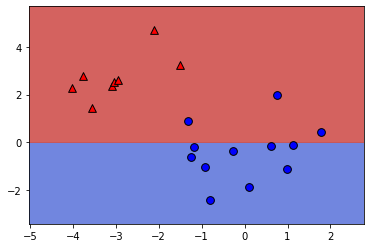

Number of errors: 3


In [6]:
# Set the coefficients
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

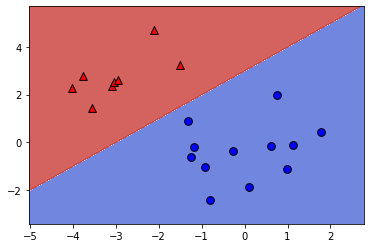

Number of errors: 0

As you can see, the coefficients determine the slope of the boundary and the intercept shifts it.


In [8]:
# Set the coefficients
model.coef_ = np.array([[-1,1]])
model.intercept_ = np.array([-3])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)
print("\nAs you can see, the coefficients determine the slope of the boundary and the intercept shifts it.")

## What is a loss function?
- Least squares: the squared loss
    - scikit-learn's `LinearRegression` minimizes a loss:
    $$ \sum_{i=1}^{n}(\text{true ith target value - predicted ith target value})^2 $$
    - Minimization is with respect to coefficients or parameters of the model.
- Classification errors: the 0-1 loss
    - Squared loss not appropriate for classification problems
    - A natrual loss for classification problem is the number of errors
    - This is the **0-1 loss**: it's 0 for a correct prediction and 1 for an incorrect prediction
    - But this loss is hard to minimize

### Minimizing a loss function
In this exercise you'll implement linear regression "from scratch" using `scipy.optimize.minimize`.

We'll train a model on the Boston housing price data set.

In [9]:
X = pd.read_csv('dataset/boston_X.csv').to_numpy()
y = pd.read_csv('dataset/boston_y.csv').to_numpy()

In [10]:
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# The squared error, summed overt training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred) ** 2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X, y)
print(lr.coef_)

[-9.16299653e-02  4.86753446e-02 -3.77679680e-03  2.85637065e+00
 -2.88057050e+00  5.92521235e+00 -7.22477068e-03 -9.67992962e-01
  1.70449044e-01 -9.38970634e-03 -3.92422954e-01  1.49831080e-02
 -4.16973126e-01]
[[-9.16297843e-02  4.86751203e-02 -3.77930006e-03  2.85636751e+00
  -2.88077933e+00  5.92521432e+00 -7.22447929e-03 -9.67995240e-01
   1.70443393e-01 -9.38925373e-03 -3.92425680e-01  1.49832102e-02
  -4.16972624e-01]]


![](Images/0-1 loss diagram.jpg)
![](Images/linear regression loss diagram.jpg)
![](Images/logistic loss diagram.jpg)
![](Images/Hinge loss diagram.jpg)
![](Images/logistic hinge loss diagram.png)